# Problem 1: Linear Regression

# You are hired by a company Gem Stones co ltd, which is a cubic zirconia manufacturer. You are provided with the dataset containing the prices and other attributes of almost 27,000 cubic zirconia (which is an inexpensive diamond alternative with many of the same qualities as a diamond). The company is earning different profits on different prize slots. You have to help the company in predicting the price for the stone on the bases of the details given in the dataset so it can distinguish between higher profitable stones and lower profitable stones so as to have better profit share. Also, provide them with the best 5 attributes that are most important.


Dataset for Problem 1: cubic_zirconia.csv

In [55]:
# importing essential libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_palette("hsv")
from sklearn.linear_model import LinearRegression

In [56]:
# protecting from warning
import warnings
warnings.filterwarnings("ignore")

In [59]:
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')

In [61]:
# import the dataset
df = pd.read_csv("cubic_zirconia.csv",index_col="Unnamed: 0")

In [62]:
# checking top 5 rows
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


# 1.1. Read the data and do exploratory data analysis. Describe the data briefly. (Check the null values, Data types, shape, EDA, duplicate values). Perform Univariate and Bivariate Analysis.

In [63]:
df.shape

(26967, 10)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


In [65]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
x          float64
y          float64
z          float64
price        int64
dtype: object

In [66]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
carat,26967.0,0.798375,0.477745,0.2,0.40,0.70,1.05,4.50
depth,26270.0,61.745147,1.412860,50.8,61.00,61.80,62.50,73.60
table,26967.0,57.456080,2.232068,49.0,56.00,57.00,59.00,79.00
x,26967.0,5.729854,1.128516,0.0,4.71,5.69,6.55,10.23
y,26967.0,5.733569,1.166058,0.0,4.71,5.71,6.54,58.90
z,26967.0,3.538057,0.720624,0.0,2.90,3.52,4.04,31.80
price,26967.0,3939.518115,4024.864666,326.0,945.00,2375.00,5360.00,18818.00


In [67]:
# check for null values
df.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [68]:
# we have outliers in the depth column, replcae nan by median
df["depth"] = df["depth"].replace(np.nan,df.depth.median())

In [69]:
# check for null values
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [70]:
# check for duplicate
df.duplicated().sum()

34

In [71]:
# remove duplicates
df.drop_duplicates(inplace= True)

In [72]:
# we will drop the row where z=0 because it doesn't make any sense
df = df[df["z"]!=0]

# 1.2 Impute null values if present, also check for the values which are equal to zero. Do they have any meaning or do we need to change them or drop them? Check for the possibility of combining the sub levels of a ordinal variables and take actions accordingly. Explain why you are combining these sub levels with appropriate reasoning.

In [73]:
df_1 = df.select_dtypes(["float64","int64"])
df_1.head()

,carat,depth,table,x,y,z,price
1,0.30,62.1,58.0,4.27,4.29,2.66,499
2,0.33,60.8,58.0,4.42,4.46,2.70,984
3,0.90,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,60.4,59.0,4.35,4.43,2.65,779


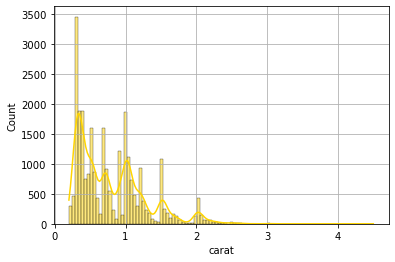

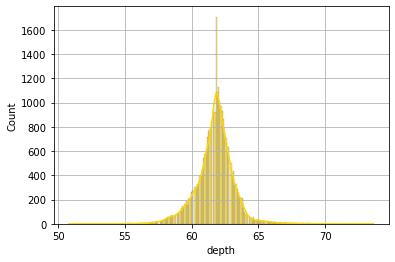

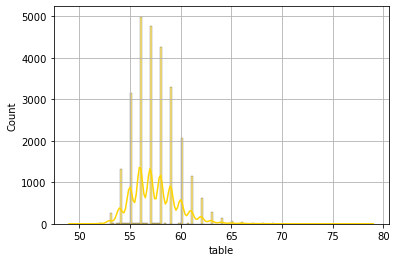

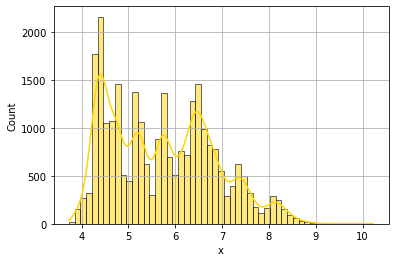

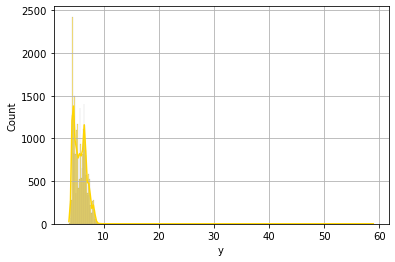

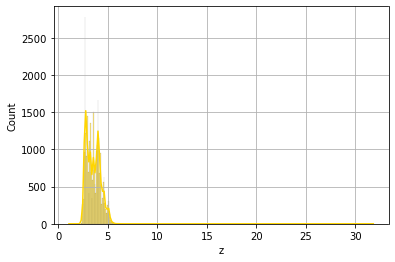

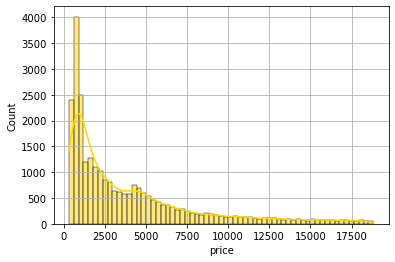

In [74]:
for features in df_1.columns:
    sns.histplot(x = df[features],data= df_1,kde = True);
    plt.grid()
    plt.show()

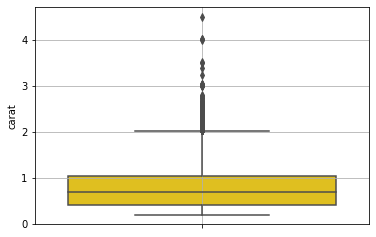

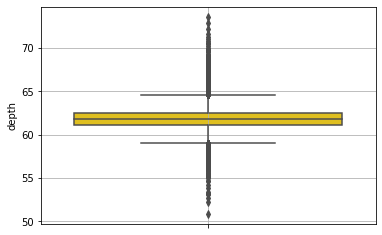

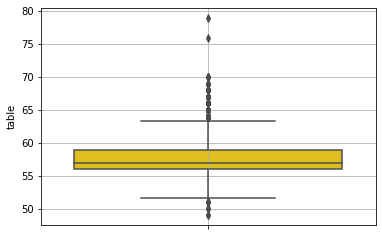

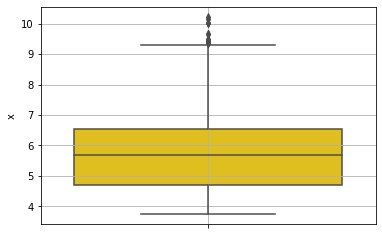

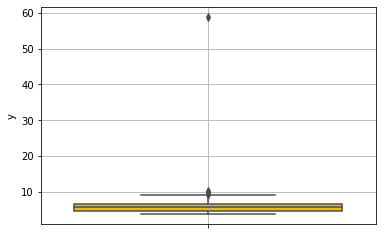

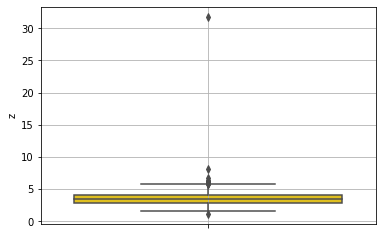

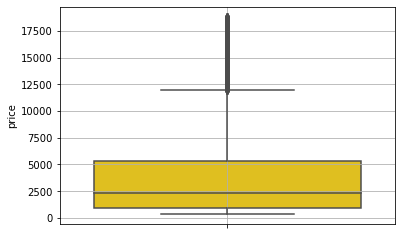

In [75]:
for features in df_1.columns:
    sns.boxplot(y = df[features],data=df_1);
    plt.grid()
    plt.show()

In [76]:
df_2 = df.select_dtypes("object")
df_2.head()

,cut,color,clarity
1,Ideal,E,SI1
2,Premium,G,IF
3,Very Good,E,VVS2
4,Ideal,F,VS1
5,Ideal,F,VVS1


In [77]:
for features in df_2.columns:
    print(df[features].value_counts())

Ideal        10805
Premium       6880
Very Good     6027
Good          2434
Fair           779
Name: cut, dtype: int64
G    5650
E    4916
F    4722
H    4091
D    3341
I    2765
J    1440
Name: color, dtype: int64
SI1     6564
VS2     6092
SI2     4561
VS1     4086
VVS2    2530
VVS1    1839
IF       891
I1       362
Name: clarity, dtype: int64


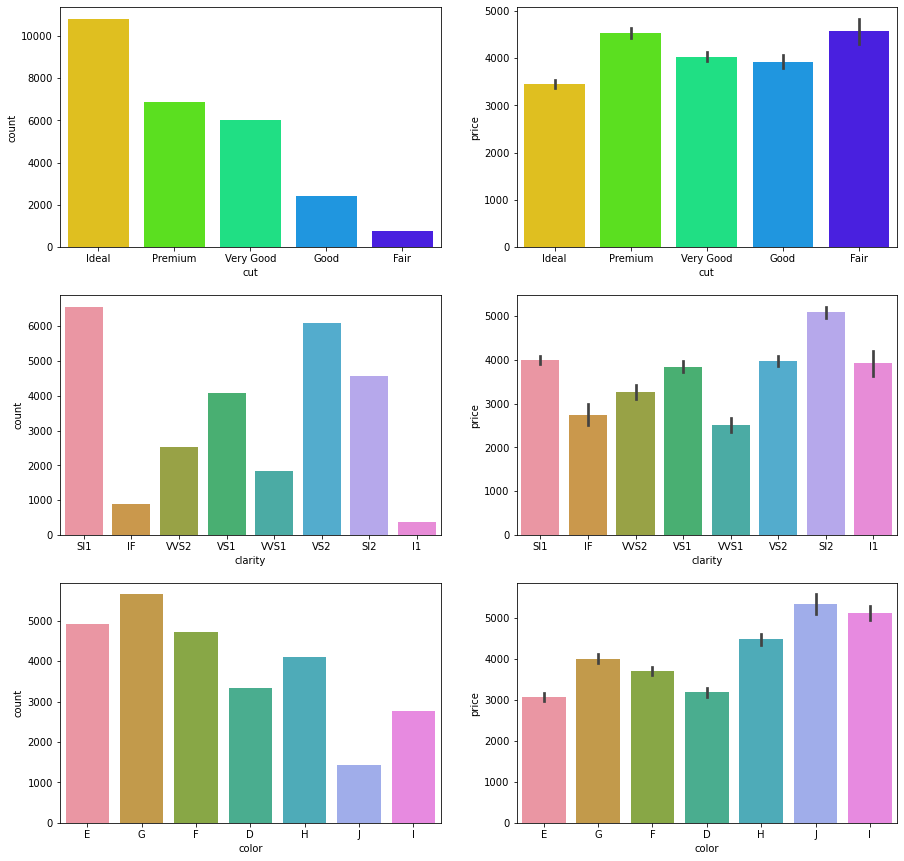

In [78]:
fig,axes = plt.subplots(nrows = 3,ncols = 2)
fig.set_size_inches(15,15)
sns.countplot(x="cut",data =df,ax=axes[0][0])
sns.barplot(x="cut",y="price",data=df,ax=axes[0][1])
sns.countplot(x="clarity",data =df,ax=axes[1][0])
sns.barplot(x="clarity",y="price",data=df,ax=axes[1][1])
sns.countplot(x="color",data =df,ax=axes[2][0])
sns.barplot(x="color",y="price",data=df,ax=axes[2][1])
plt.show()

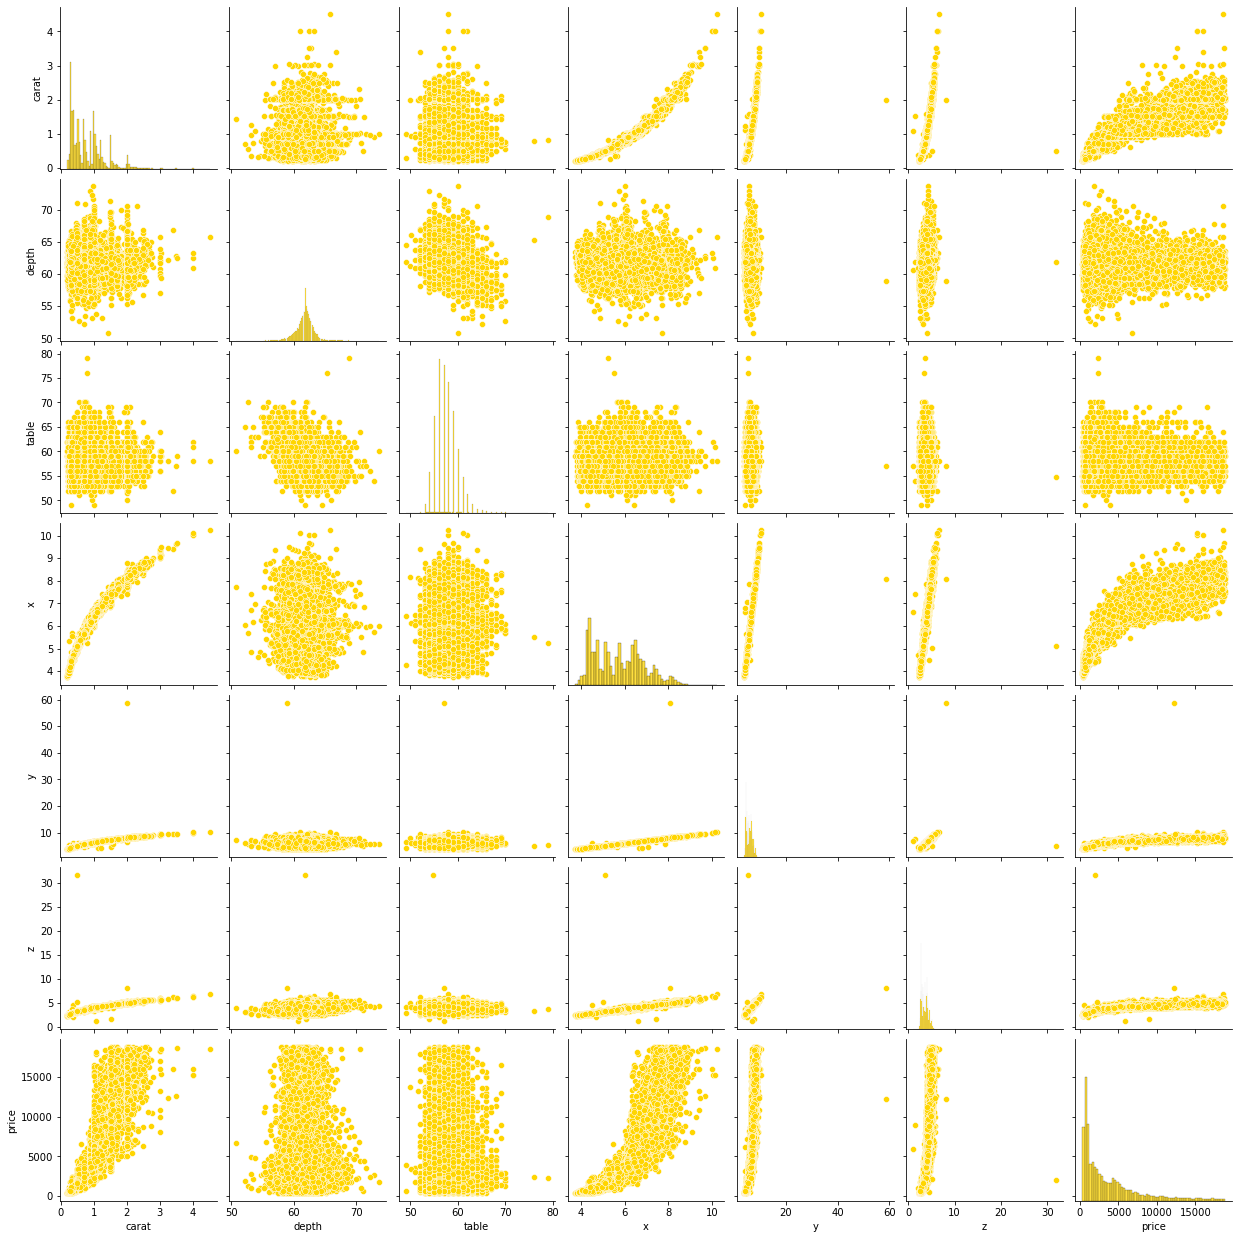

In [79]:
sns.pairplot(df, diag_kind = 'hist')
plt.show()

<AxesSubplot:>

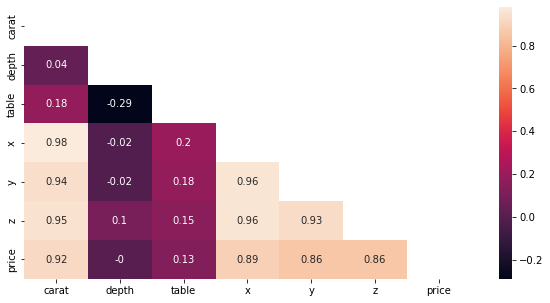

In [80]:
corr = df.corr()
round(corr,2)
fig_dims = (10, 5)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)

In [81]:
# removing outlier from numeric columns
def remove_outliers(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = (Q1-1.5*IQR)
    upper_range = (Q1+1.5*IQR)
    return lower_range,upper_range

In [82]:
for i in df_1.columns:
    LL,UL = remove_outliers(df[i])
    df[i] = np.where(df[i]>UL,UL,df[i])
    df[i] = np.where(df[i]<LL,LL,df[i])

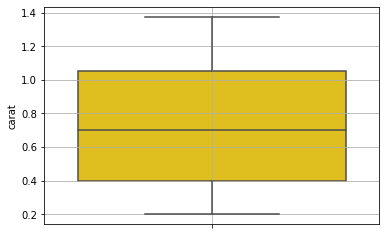

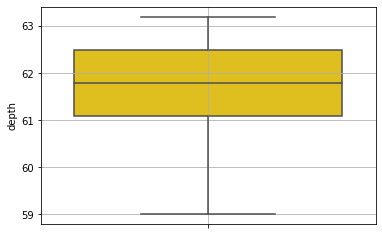

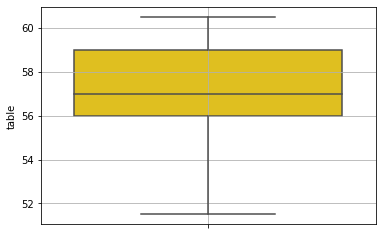

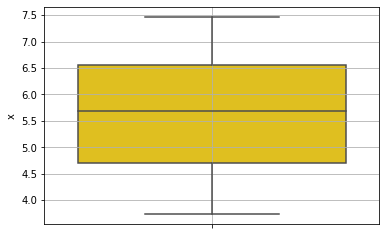

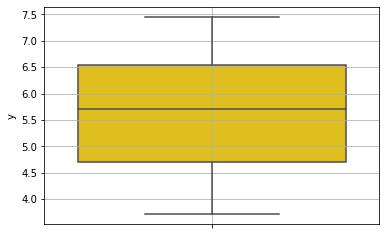

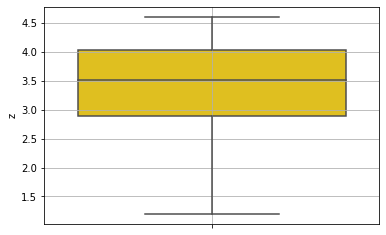

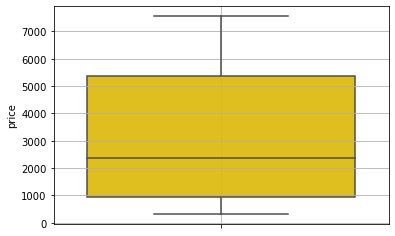

In [83]:
for features in df_1.columns:
    sns.boxplot(y = df[features],data=df_1);
    plt.grid()
    plt.show()

In [84]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
# This is also kown as one hot coding. The column names will be America, Europe and Asia... with one hot coding
df = pd.get_dummies(df, columns=['cut','color','clarity'])
df

,carat,depth,table,x,y,z,price,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.30,62.1,58.0,4.27,4.29,2.66,499.0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.33,60.8,58.0,4.42,4.46,2.70,984.0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0.90,62.2,60.0,6.04,6.12,3.78,6289.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0.42,61.6,56.0,4.82,4.80,2.96,1082.0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,0.31,60.4,59.0,4.35,4.43,2.65,779.0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26963,1.11,62.3,58.0,6.61,6.52,4.09,5408.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
26964,0.33,61.9,55.0,4.44,4.42,2.74,1114.0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
26965,0.51,61.7,58.0,5.12,5.15,3.17,1656.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
26966,0.27,61.8,56.0,4.19,4.20,2.60,682.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


# 1.3 Encode the data (having string values) for Modelling. Split the data into train and test (70:30). Apply Linear regression using scikit learn. Perform checks for significant variables using appropriate method from statsmodel. Create multiple models and check the performance of Predictions on Train and Test sets using Rsquare, RMSE & Adj Rsquare. Compare these models and select the best one with appropriate reasoning.

In [85]:
# Copy all the predictor variables into x dataframe. Since 'price' is dependent variable drop it
x = df.drop('price', axis=1)

# Copy the 'mpg' column alone into the y dataframe. This is the dependent variable
y = df[['price']]

In [86]:
#Let us break the x and y dataframes into training set and test set. For this we will use
from sklearn.model_selection import train_test_split

In [87]:
# Split x and y into training and test set in 70:30 ratio
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [88]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(x_train, y_train)

LinearRegression()

In [89]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 9879.74906470684
The coefficient for depth is 6.645725967731859
The coefficient for table is -16.83961699570299
The coefficient for x is -1006.5848626597921
The coefficient for y is 507.9045607303932
The coefficient for z is -783.0114291254632
The coefficient for cut_Fair is -311.1785238207951
The coefficient for cut_Good is -15.387551841475974
The coefficient for cut_Ideal is 148.86595592633068
The coefficient for cut_Premium is 114.62223466036204
The coefficient for cut_Very Good is 63.077885075571174
The coefficient for color_D is 436.7856701360541
The coefficient for color_E is 298.2607857989921
The coefficient for color_F is 239.10432396715805
The coefficient for color_G is 134.62680278844195
The coefficient for color_H is -88.72238439285996
The coefficient for color_I is -375.9290202705354
The coefficient for color_J is -644.1261780272553
The coefficient for clarity_I1 is -1759.3077080526077
The coefficient for clarity_IF is 779.3607309049735
The coef

In [90]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1751.07439533645


In [91]:
regression_model.score(x_train, y_train)

0.9545358701420875

In [92]:
data_train = pd.concat([x_train, y_train], axis=1)
data_train.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2,price
5031,1.10,63.2,56.0,6.53,6.58,4.15,0,1,0,0,...,0,0,0,0,1,0,0,0,0,4065.0
12109,1.01,63.2,56.0,6.30,6.38,4.06,0,0,0,0,...,0,0,0,0,1,0,0,0,0,5166.0
20182,0.67,60.7,60.5,5.60,5.64,3.41,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1708.0
4713,0.76,59.0,60.5,6.05,5.97,3.47,0,1,0,0,...,0,0,0,1,0,0,0,0,0,2447.0
2549,1.01,62.8,59.0,6.37,6.34,3.99,0,0,0,1,...,0,0,0,0,0,1,0,0,0,6618.0


In [93]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'price ~ carat+depth+table+x+y+z', data = data_train).fit()
lm1.params

Intercept     7820.504293
carat        10143.749380
depth          -26.529408
table          -54.508893
x            -2104.752663
y             1689.011762
z            -1437.314343
dtype: float64

In [94]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                 3.372e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):               0.00
Time:                        20:23:32   Log-Likelihood:            -1.5131e+05
No. Observations:               18847   AIC:                         3.026e+05
Df Residuals:                   18840   BIC:                         3.027e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7820.5043    641.529     12.190      0.0

In [95]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases

mse = np.mean((regression_model.predict(x_test)-y_test)**2)

In [96]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

546.4932963492641

In [97]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(x_test, y_test)

0.9546467224179124

In [98]:
# predict price for a set of attributes not in the training or test set
y_pred = regression_model.predict(x_test)

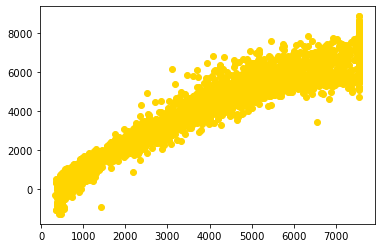

In [99]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
#plt.rcParams['figure.dpi'] = 500


plt.scatter(y_test['price'], y_pred)

In [100]:
from scipy.stats import zscore

x_train_scaled  = x_train.apply(zscore)
x_test_scaled = x_test.apply(zscore)
y_train_scaled = y_train.apply(zscore)
y_test_scaled = y_test.apply(zscore)


In [101]:
regression_model = LinearRegression()
regression_model.fit(x_train_scaled, y_train_scaled)

LinearRegression()

In [102]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for carat is 1.4620749863912093
The coefficient for depth is 0.0028925267902884405
The coefficient for table is -0.01271566591017889
The coefficient for x is -0.41608835726904386
The coefficient for y is 0.20848127302000038
The coefficient for z is -0.19998616361283564
The coefficient for cut_Fair is -0.025553712386092234
The coefficient for cut_Good is -0.01106266946559369
The coefficient for cut_Ideal is 0.01286136316616143
The coefficient for cut_Premium is 0.005549132542145447
The coefficient for cut_Very Good is -0.003137087569508995
The coefficient for color_D is 0.04567059107298104
The coefficient for color_E is 0.032649901082724204
The coefficient for color_F is 0.02327162019928423
The coefficient for color_G is 0.00816866376450106
The coefficient for color_H is -0.02434802150645722
The coefficient for color_I is -0.054849510007024344
The coefficient for color_J is -0.06428090776571506
The coefficient for clarity_I1 is -0.08256493320349233
The coefficient for cl

In [103]:
intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 5.596392682296561e-16


In [104]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS

regression_model.score(x_test_scaled, y_test_scaled)

0.9546665332957563

In [105]:
# Let us check the sum of squared errors by predicting value of y for training cases and 
# subtracting from the actual y for the training cases

mse = np.mean((regression_model.predict(x_test_scaled)-y_test_scaled)**2)

In [106]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

0.21291657216910984

In [107]:
# predict mileage (mpg) for a set of attributes not in the training or test set
y_pred = regression_model.predict(x_test_scaled)

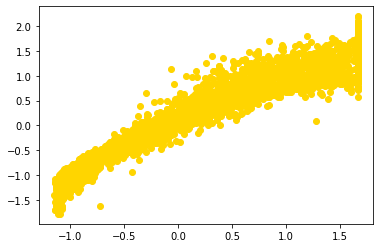

In [108]:
# Since this is regression, plot the predicted y value vs actual y values for the test data
# A good model's prediction will be close to actual leading to high R and R2 values
plt.scatter(y_test_scaled['price'], y_pred)

In [109]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [110]:
vif = [variance_inflation_factor(x.values, ix) for ix in range(x.shape[1])]

In [111]:
i=0
for column in x.columns:
    if i < 11:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 89.76155021601936
depth ---> 3.361565126924102
table ---> 1.8201306889611264
x ---> 485.94173750348426
y ---> 442.19216182623285
z ---> 202.7219307011127
cut_Fair ---> inf
cut_Good ---> inf
cut_Ideal ---> inf
cut_Premium ---> inf
cut_Very Good ---> inf


In [112]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [113]:
def find_best_model(x,y):
    algos= {
        "linear_regression" : {
            "model" : LinearRegression(),
            "params" : {
                "normalize" : [True,False]
            }
        },
        "lasso" : {
            "model" : Lasso(),
            "params" : {
                "alpha" : [1,2],
                "selection" : ['random','cyclic']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.30,random_state=1)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config["model"],config["params"],cv=cv,return_train_score = False)
        gs.fit(x,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params" : gs.best_params_
        })
    
    return pd.DataFrame(scores,columns = ["model","best_score","best_params"])
   
find_best_model(x,y)

,model,best_score,best_params
0,linear_regression,0.954884,{'normalize': True}
1,lasso,0.954631,"{'alpha': 1, 'selection': 'random'}"


# 1.4 Inference: Basis on these predictions, what are the business insights and recommendations.
Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

1)So after the study of the dataset we can say that, ideal , premium and very good cut provides a better business having better price along the other.

2)From the scatter plot between price and carat, as the carat weight increase the price increase

3)L1 type of clarity having more price than any other clarity type.

4)From the pairplot, depth and table column not having major impact on the price of the cubic. We can drop these column for price prediction

# Problem 2: Logistic Regression and LDA

# You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.¶

Dataset for Problem 2: Holiday_Package.csv

# Attribute Information:
    
Holiday_Package : Opted for Holiday Package yes/no?

Salary : Employee salary

age : Age in years

edu : Years of formal education

no_young_children : The number of young children (younger than 7 years)

no_older_children : Number of older children

foreign : foreigner Yes/No

In [1]:
import pandas as pd
# importing ploting libraries
import matplotlib.pyplot as plt   
#importing seaborn for statistical plots
import seaborn as sns
#Let us break the X and y dataframes into training set and test set. For this we will use
#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
import numpy as np
# calculate accuracy measures and confusion matrix
from sklearn.metrics import confusion_matrix, classification_report,plot_confusion_matrix
# importing logistic regression and linear_discriminant_analysis package 
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

sns.set_palette("brg")

In [3]:

import warnings
warnings.filterwarnings("ignore")
import os
os.getcwd()
os.chdir('C:\\Users\\Neha Mishra\\Downloads')

In [6]:
df = pd.read_csv("Holiday_Package.csv",index_col="Unnamed: 0")

In [8]:
df.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no
6,yes,61590,42,12,0,1,no
7,no,94344,51,8,0,0,no
8,yes,35987,32,8,0,2,no
9,no,41140,39,12,0,0,no
10,no,35826,43,11,0,2,no


In [9]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [10]:
df.dtypes

Holliday_Package     object
Salary                int64
age                   int64
educ                  int64
no_young_children     int64
no_older_children     int64
foreign              object
dtype: object

In [11]:
# data description
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872.0,NaN,NaN,NaN,47729.172018,23418.668531,1322.0,35324.0,41903.5,53469.5,236961.0
age,872.0,NaN,NaN,NaN,39.955275,10.551675,20.0,32.0,39.0,48.0,62.0
educ,872.0,NaN,NaN,NaN,9.307339,3.036259,1.0,8.0,9.0,12.0,21.0
no_young_children,872.0,NaN,NaN,NaN,0.311927,0.61287,0.0,0.0,0.0,0.0,3.0
no_older_children,872.0,NaN,NaN,NaN,0.982798,1.086786,0.0,0.0,1.0,2.0,6.0
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 2.1 Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [12]:
df.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [13]:
df.duplicated().sum()

0

In [14]:
df_1 = df.select_dtypes("object")
df_1.head()

,Holliday_Package,foreign
1,no,no
2,yes,no
3,no,no
4,no,no
5,no,no


In [15]:
df_2 = df.select_dtypes(["float64","int64"])
df_2

,Salary,age,educ,no_young_children,no_older_children
1,48412,30,8,1,1
2,37207,45,8,0,1
3,58022,46,9,0,0
4,66503,31,11,2,0
5,66734,44,12,0,2
...,...,...,...,...,...
868,40030,24,4,2,1
869,32137,48,8,0,0
870,25178,24,6,2,0
871,55958,41,10,0,1


In [16]:
for items in df_2.columns:
    print(df_2[items].value_counts())

46195     2
33357     2
39460     2
36976     2
40270     2
         ..
38352     1
119644    1
96072     1
115431    1
74659     1
Name: Salary, Length: 864, dtype: int64
44    35
31    32
34    32
35    31
33    30
28    29
40    29
36    28
38    28
32    27
47    26
41    26
39    25
26    24
42    24
46    24
49    23
45    23
51    22
50    21
37    21
43    21
48    20
27    19
29    19
30    19
57    18
56    18
55    17
25    17
58    16
24    16
59    14
54    14
52    13
21    12
23    11
53    10
60    10
22     9
61     8
20     8
62     3
Name: age, dtype: int64
8     157
12    124
9     114
11    100
10     90
5      67
4      50
13     43
7      31
14     25
6      21
15     15
3      11
16     10
2       6
17      3
19      2
21      1
18      1
1       1
Name: educ, dtype: int64
0    665
1    147
2     55
3      5
Name: no_young_children, dtype: int64
0    393
2    208
1    198
3     55
4     14
5      2
6      2
Name: no_older_children, dtype: int64


In [17]:
for items in df_1.columns:
    print(df_1[items].value_counts())

no     471
yes    401
Name: Holliday_Package, dtype: int64
no     656
yes    216
Name: foreign, dtype: int64


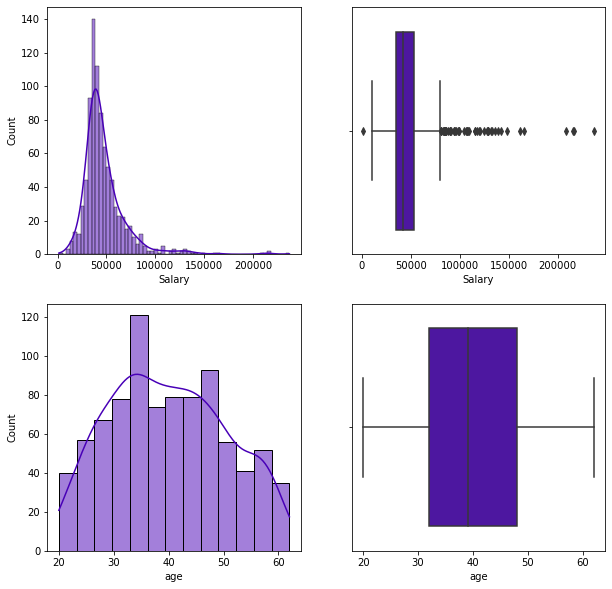

In [18]:
fig,axes = plt.subplots(nrows = 2,ncols = 2)
fig.set_size_inches(10,10)
sns.histplot(df["Salary"],kde=True,ax=axes[0][0])
sns.boxplot(x="Salary",data=df,ax=axes[0][1])
sns.histplot(df["age"],kde=True,ax=axes[1][0])
sns.boxplot(x="age",data=df,ax=axes[1][1])
plt.show()

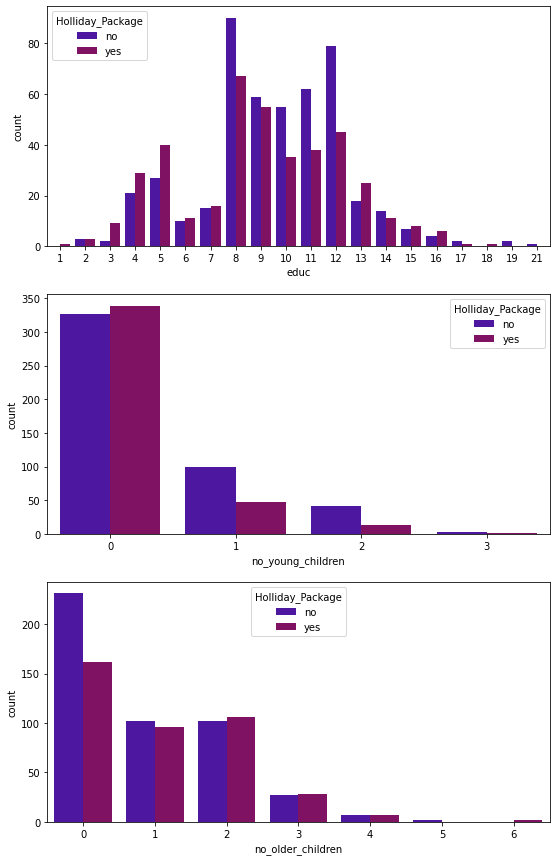

In [19]:
fig,axes = plt.subplots(nrows = 3,ncols = 1)
fig.set_size_inches(9,15)
sns.countplot(x="educ", hue="Holliday_Package",data=df, ax=axes[0])
sns.countplot(x="no_young_children",hue="Holliday_Package", data=df, ax=axes[1])
sns.countplot(x="no_older_children", hue="Holliday_Package",data=df, ax=axes[2])

plt.show()

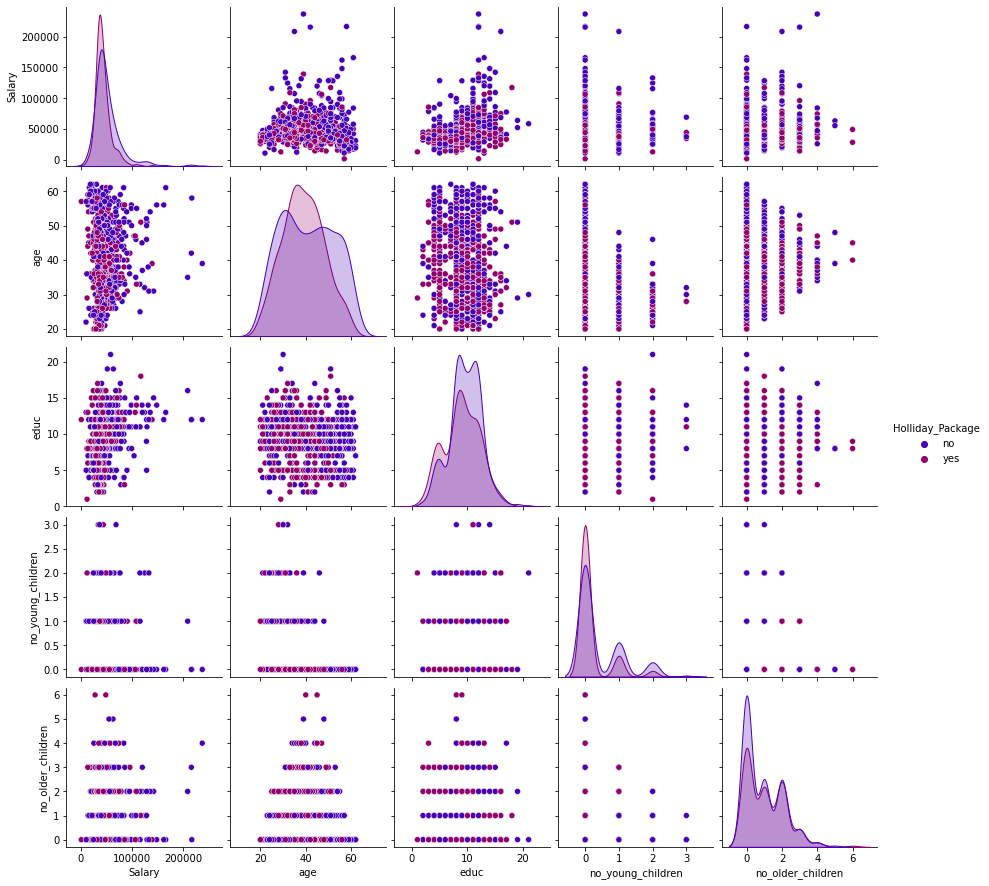

In [20]:
sns.pairplot(df,hue = "Holliday_Package",diag_kind ='kde')

<AxesSubplot:>

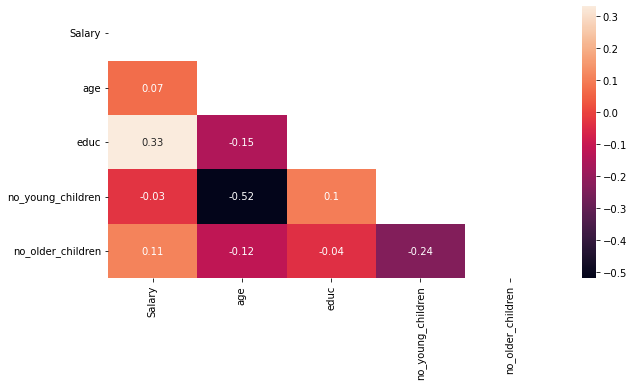

In [21]:
corr = df.corr()
round(corr,2)
fig_dims = (10, 5)
fig = plt.subplots(figsize=fig_dims)
mask = np.triu(np.ones_like(corr, dtype=np.bool)) 
sns.heatmap(round(corr,2), annot=True, mask=mask)

In [22]:
df_3 = pd.DataFrame(df.Salary)
df_3

,Salary
1,48412
2,37207
3,58022
4,66503
5,66734
...,...
868,40030
869,32137
870,25178
871,55958


In [26]:
# removing outlier from numeric columns
def remove_outliers(col):
    Q1,Q3=col.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = (Q1-1.5*IQR)
    upper_range = (Q1+1.5*IQR)
    return lower_range,upper_range

In [27]:
for i in df_3.columns:
    LL,UL = remove_outliers(df[i])
    df[i] = np.where(df[i]>UL,UL,df[i])
    df[i] = np.where(df[i]<LL,LL,df[i])

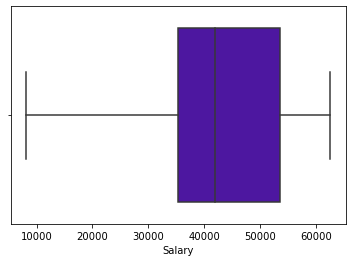

In [28]:
sns.boxplot(df["Salary"]);

In [29]:
df["Holliday_Package"] = df["Holliday_Package"].replace({"no":0,"yes":1})

In [30]:
df = pd.get_dummies(df, columns=['foreign'])

In [31]:
df.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign_no,foreign_yes
1,0,48412.00,30,8,1,1,1,0
2,1,37207.00,45,8,0,1,1,0
3,0,58022.00,46,9,0,0,1,0
4,0,62542.25,31,11,2,0,1,0
5,0,62542.25,44,12,0,2,1,0


# 2.2 Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

In [32]:
# Copy all the predictor variables into x dataframe. Since 'Holliday_Package' is dependent variable drop it
x = df.drop('Holliday_Package', axis=1)

# Copy the 'Holliday_Package' column alone into the y dataframe. This is the dependent variable
y = df[['Holliday_Package']]

In [33]:
# Split x and y into training and test set in 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30 , random_state=1)

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [35]:
def find_best_model(x,y):
    algos= {
        "LogisticRegression" : {
            "model" : LogisticRegression(),
            "params" : {
                "tol" : [0.0001,0.00001,0.000001],
                "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                "penalty" : ['l2' , 'l1' ,'elasticnet']
            }
        },
        "LinearDiscriminantAnalysis" : {
            "model" : LinearDiscriminantAnalysis(),
            "params" : {
                "n_components" : [0,1,2],
                "tol" : [0.0001,0.00001,0.000001],
                "solver": ['svd', 'lsqr', 'eigen']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits = 5 , test_size = 0.30,random_state=1)
    for algo_name,config in algos.items():
        gs = GridSearchCV(config["model"],config["params"],cv=cv,return_train_score = False)
        gs.fit(x,y)
        scores.append({
            "model": algo_name,
            "best_score": gs.best_score_,
            "best_params" : gs.best_params_
        })
    
    return pd.DataFrame(scores,columns = ["model","best_score","best_params"])
   
find_best_model(x_train,y_train)

,model,best_score,best_params
0,LogisticRegression,0.666667,"{'penalty': 'l1', 'solver': 'liblinear', 'tol'..."
1,LinearDiscriminantAnalysis,0.663388,"{'n_components': 0, 'solver': 'svd', 'tol': 0...."


In [36]:
find_best_model(x_test,y_test)

,model,best_score,best_params
0,LogisticRegression,0.640506,"{'penalty': 'l2', 'solver': 'newton-cg', 'tol'..."
1,LinearDiscriminantAnalysis,0.643038,"{'n_components': 0, 'solver': 'svd', 'tol': 0...."


# 2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

In [37]:
# checking for logisticRegression
model = LogisticRegression(penalty='l2',tol=0.00001,solver='liblinear')
model.fit(x_train, y_train)

LogisticRegression(solver='liblinear', tol=1e-05)

In [38]:
y_pred_test = model.predict(x_test)

In [39]:
y_pred_train = model.predict(x_train)

In [40]:
confusion_matrix(y_train,y_pred_train)

array([[253,  73],
       [125, 159]], dtype=int64)

In [41]:
confusion_matrix(y_test,y_pred_test)

array([[104,  41],
       [ 51,  66]], dtype=int64)

In [42]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [43]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.72      0.69       145
           1       0.62      0.56      0.59       117

    accuracy                           0.65       262
   macro avg       0.64      0.64      0.64       262
weighted avg       0.65      0.65      0.65       262



Train AUC: 0.741
Test AUC: 0.697


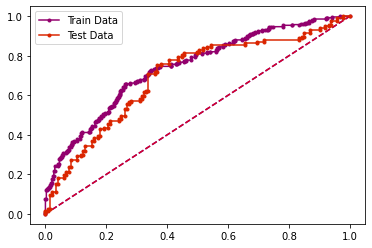

In [44]:
# AUC and ROC for the training data
probs = model.predict_proba(x_train)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score

# calculate AUC
train_auc = roc_auc_score(y_train,probs)
print('Train AUC: %.3f' % train_auc)

#  calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresold = roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Train Data')


# AUC and ROC for the testing data
probs = model.predict_proba(x_test)
probs = probs[:,1]

# calculate AUC
test_auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % test_auc)
fpr,tpr,thresold = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.legend(loc='best')
plt.show()

In [45]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [46]:
clf = LinearDiscriminantAnalysis()
model=clf.fit(x_train,y_train)
model

LinearDiscriminantAnalysis()

In [47]:
y_pred_test = model.predict(x_test)

In [48]:
y_pred_train = model.predict(x_train)

In [49]:
confusion_matrix(y_train,y_pred_train)

array([[254,  72],
       [125, 159]], dtype=int64)

In [50]:
confusion_matrix(y_test,y_pred_test)

array([[100,  45],
       [ 51,  66]], dtype=int64)

In [51]:
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       326
           1       0.69      0.56      0.62       284

    accuracy                           0.68       610
   macro avg       0.68      0.67      0.67       610
weighted avg       0.68      0.68      0.67       610



In [52]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.66      0.69      0.68       145
           1       0.59      0.56      0.58       117

    accuracy                           0.63       262
   macro avg       0.63      0.63      0.63       262
weighted avg       0.63      0.63      0.63       262



Train AUC: 0.739
Test AUC: 0.701


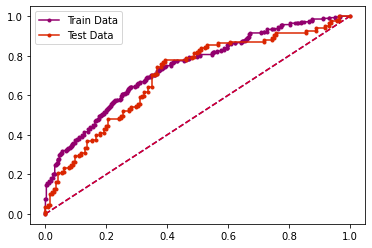

In [53]:
# AUC and ROC for the training data
probs = model.predict_proba(x_train)
probs = probs[:,1]
from sklearn.metrics import roc_auc_score

# calculate AUC
auc = roc_auc_score(y_train,probs)
print('Train AUC: %.3f' % auc)

#  calculate roc curve
from sklearn.metrics import roc_curve
fpr,tpr,thresold = roc_curve(y_train,probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Train Data')


# AUC and ROC for the testing data
probs = model.predict_proba(x_test)
probs = probs[:,1]

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('Test AUC: %.3f' % auc)
fpr,tpr,thresold = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr, marker='.',label='Test Data')

plt.legend(loc='best')
plt.show()

# 2.4 Inference: Basis on these predictions, what are the insights and recommendations.

Please explain and summarise the various steps performed in this project. There should be proper business interpretation and actionable insights present.

1)The age group between 30 to 50 preferring holidays . rest of the customer no taking that much of interest in holiday. By various attractive offers one can try this age group of customer for holidays.

2)The no_young_children and no_older_children column having 0 count can be attracted more for holidays already half of them are signing. By finding the appropriate reason we can attract more from this group of customer.

3)From income group 35000 to 50000 are too excited about holidays. By good marketing these customer flow can be increase to seek holiday package.